## Connect to database

In [1]:
import psycopg2
import pandas as pd
import numpy as np

In [2]:
con = psycopg2.connect(user = "postgres",
                       password = "",
                       host = "127.0.0.1",
                       port = "5432",
                       database = "adj_noun_pairs")

try:
    cursor = con.cursor();
except (Exception, psycopg2.Error) as error:
    print("Error in Connection",error)

## Classification based on Jaccard index for nouns

### Finding the Jaccard index

In [3]:
import itertools
import time
from datetime import timedelta, datetime
from collections import defaultdict

In [4]:
cursor.execute("SELECT DISTINCT noun, STRING_AGG(adjective, ',') FROM final_pairs GROUP BY noun")
adjectives_listed = cursor.fetchall() 

In [5]:
adjectives_listed[0]

('sõidurada', 'täiendav,uus,parempoolne,suunduv,suletud,väljuv')

In [6]:
dict_nouns = {}

for tup in adjectives_listed:
    dict_nouns[tup[0]] = tup[1].split(',')

In [7]:
noun_pairs = list(itertools.combinations(dict_nouns.keys(), 2))
len(noun_pairs)

KeyboardInterrupt: 

In [9]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

noun_similarities = defaultdict(dict)

for pair in noun_pairs:
    first_word = pair[0]
    second_word = pair[1]
    first_word_adjs = dict_nouns[first_word]
    second_word_adjs = dict_nouns[second_word]
    similarity = len(set(first_word_adjs) & set(second_word_adjs))/len(set(first_word_adjs) | set(second_word_adjs))
    
    noun_similarities[first_word][second_word] = similarity
    noun_similarities[second_word][first_word] = similarity
    
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

1:33:18.772393
1:40:49.058553
0:07:30.291204


### Creating the distance matrix

In [10]:
import pandas as pd
import numpy as np

In [11]:
noun_df = pd.DataFrame(noun_similarities)
noun_df = noun_df.reindex(sorted(noun_df.columns), axis=1)
noun_df = noun_df.reindex(sorted(noun_df.index), axis=0)
noun_df = noun_df.fillna(1)

In [12]:
noun_df

,3-seeria,A-klass,A-proov,A-riis,ABS-pidur,AKV-banaan,B-proov,Bondi-film,C-hepatiit,C-klass,...,šantaaž,šedööver,šerif,šiiit,šokk,šokolaad,žanr,žest,žürii,ω-3-rasvhape
3-seeria,1.00,0.5,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,1.00,...,0.000000,0.0,0.0,0.0,0.083333,0.0,0.25,0.000000,0.000000,0.0
A-klass,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.50,...,0.000000,0.0,0.0,0.0,0.166667,0.0,0.20,0.000000,0.000000,0.0
A-proov,0.00,0.0,1.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0
A-riis,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0
ABS-pidur,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
šokolaad,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,1.0,0.00,0.000000,0.000000,0.0
žanr,0.25,0.2,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.25,...,0.000000,0.0,0.0,0.0,0.066667,0.0,1.00,0.000000,0.000000,0.0
žest,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.166667,0.0,0.0,0.0,0.058824,0.0,0.00,1.000000,0.045455,0.0
žürii,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.074074,0.0,0.00,0.045455,1.000000,0.0


In [13]:
noun_df.to_csv("noun_similarities.csv")

In [42]:
## Change similarity matrix to distance matrix
noun_dist_df = noun_df.apply(lambda x: 1 - x)

MemoryError: Unable to allocate 1.59 GiB for an array with shape (14590, 14590) and data type float64

In [ ]:
noun_dist_df

In [25]:
(noun_df == 0).astype(int).sum(axis=1)

3-seeria        10981
A-klass         10328
A-proov         14371
A-riis          14588
ABS-pidur       14174
                ...  
šokolaad        12562
žanr            10685
žest            11318
žürii           10591
ω-3-rasvhape    14539
Length: 14590, dtype: int64

In [4]:
noun_df = pd.read_csv("noun_similarities.csv", index_col=0)

In [5]:
noun_df

,3-seeria,A-klass,A-proov,A-riis,ABS-pidur,AKV-banaan,B-proov,Bondi-film,C-hepatiit,C-klass,...,šantaaž,šedööver,šerif,šiiit,šokk,šokolaad,žanr,žest,žürii,ω-3-rasvhape
3-seeria,1.00,0.5,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,1.00,...,0.000000,0.0,0.0,0.0,0.083333,0.0,0.25,0.000000,0.000000,0.0
A-klass,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.50,...,0.000000,0.0,0.0,0.0,0.166667,0.0,0.20,0.000000,0.000000,0.0
A-proov,0.00,0.0,1.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0
A-riis,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0
ABS-pidur,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
šokolaad,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,1.0,0.00,0.000000,0.000000,0.0
žanr,0.25,0.2,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.25,...,0.000000,0.0,0.0,0.0,0.066667,0.0,1.00,0.000000,0.000000,0.0
žest,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.166667,0.0,0.0,0.0,0.058824,0.0,0.00,1.000000,0.045455,0.0
žürii,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.074074,0.0,0.00,0.045455,1.000000,0.0


In [49]:
# See ei saa hakkama sõnaga 'null' korrektselt, asendan
noun_df = noun_df.rename(index={np.nan: 'null'})

### SpectralClustering

In [6]:
from sklearn.cluster import SpectralClustering
from collections import defaultdict

In [7]:
clustering = SpectralClustering(n_clusters=500, affinity='precomputed', random_state=0)

In [8]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

clustering.fit(noun_df.values)

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

21:46:23.588760
21:58:09.675319
0:11:46.087559


In [9]:
clustering.labels_

array([  1,   1, 421, ...,   1,   1, 326])

In [10]:
labels = defaultdict(list)

for i, label in enumerate(clustering.labels_):
    labels[label].append(noun_df.index[i])

In [11]:
for i in range(500):
    print(f"Topic {i} has {len(labels[i])} words")

Topic 0 has 11 words
Topic 1 has 11614 words
Topic 2 has 1 words
Topic 3 has 2 words
Topic 4 has 2 words
Topic 5 has 2 words
Topic 6 has 2 words
Topic 7 has 3 words
Topic 8 has 2 words
Topic 9 has 1 words
Topic 10 has 3 words
Topic 11 has 2 words
Topic 12 has 2 words
Topic 13 has 2 words
Topic 14 has 2 words
Topic 15 has 2 words
Topic 16 has 2 words
Topic 17 has 2 words
Topic 18 has 2 words
Topic 19 has 2 words
Topic 20 has 2 words
Topic 21 has 2 words
Topic 22 has 2 words
Topic 23 has 2 words
Topic 24 has 2 words
Topic 25 has 2 words
Topic 26 has 2 words
Topic 27 has 2 words
Topic 28 has 2 words
Topic 29 has 1 words
Topic 30 has 2 words
Topic 31 has 2 words
Topic 32 has 2 words
Topic 33 has 2 words
Topic 34 has 1 words
Topic 35 has 2 words
Topic 36 has 2 words
Topic 37 has 2 words
Topic 38 has 1 words
Topic 39 has 2 words
Topic 40 has 2 words
Topic 41 has 2 words
Topic 42 has 2 words
Topic 43 has 2 words
Topic 44 has 3 words
Topic 45 has 2 words
Topic 46 has 2 words
Topic 47 has 2 wor

Topic 411 has 9 words
Topic 412 has 25 words
Topic 413 has 1 words
Topic 414 has 13 words
Topic 415 has 20 words
Topic 416 has 13 words
Topic 417 has 6 words
Topic 418 has 11 words
Topic 419 has 12 words
Topic 420 has 14 words
Topic 421 has 12 words
Topic 422 has 13 words
Topic 423 has 11 words
Topic 424 has 1 words
Topic 425 has 18 words
Topic 426 has 11 words
Topic 427 has 15 words
Topic 428 has 14 words
Topic 429 has 14 words
Topic 430 has 1 words
Topic 431 has 12 words
Topic 432 has 12 words
Topic 433 has 1 words
Topic 434 has 1 words
Topic 435 has 19 words
Topic 436 has 18 words
Topic 437 has 11 words
Topic 438 has 18 words
Topic 439 has 1 words
Topic 440 has 2 words
Topic 441 has 1 words
Topic 442 has 22 words
Topic 443 has 25 words
Topic 444 has 1 words
Topic 445 has 13 words
Topic 446 has 17 words
Topic 447 has 13 words
Topic 448 has 8 words
Topic 449 has 21 words
Topic 450 has 2 words
Topic 451 has 12 words
Topic 452 has 2 words
Topic 453 has 27 words
Topic 454 has 1 words
Top

In [12]:
long_topics = []
short_topics = []
medium_topics = []

for i in range(500):
    topic_len = len(labels[i])
    if topic_len >= 100:
        long_topics.append(i)
    elif topic_len <= 5:
        short_topics.append(i)
    else:
        medium_topics.append(i)

In [13]:
print(f"{len(long_topics)} topic has 100 words or more")
print(f"{len(short_topics)} topics have 5 words or less")
print(f"{len(medium_topics)} topic lengths are between 5 and 100 (not included)")

1 topic has 100 words or more
330 topics have 5 words or less
169 topic lengths are between 5 and 100 (not included)


In [14]:
print(f"Longest topic has {len(labels[long_topics[0]])} nouns")

Longest topic has 11614 nouns


In [15]:
print(f"Example of topic of medium length: {len(labels[medium_topics[0]])} words")
print(labels[medium_topics[0]])

Example of topic of medium length: 11 words
['arengustrateegia', 'deposiidireiting', 'finantsinvesteering', 'hoonestusõigus', 'investeerimine', 'jälitustöö', 'kliendisuhe', 'komandeering', 'kultuurkarjamaa', 'ladustamisleping', 'ladustusleping']


In [16]:
print(f"Example of topic of medium length: {len(labels[medium_topics[1]])} words")
print(labels[medium_topics[1]])

Example of topic of medium length: 6 words
['automaatkast', 'automaatkäigukast', 'käsikast', 'manuaal', 'manuaalkast', 'manuaalkäigukast']


In [17]:
print(f"Example of topic of medium length: {len(labels[medium_topics[2]])} words")
print(labels[medium_topics[2]])

Example of topic of medium length: 6 words
['andmetöötlusmasin', 'ilmajaam', 'kliimaseade', 'tulekahjusignalisatsioon', 'tulekustutussüsteem', 'väljalülitus']


#### Topic 1 spectral clustering

In [18]:
clustering2 = SpectralClustering(n_clusters=500, affinity='precomputed', random_state=0)

In [51]:
new_df = noun_df.loc[labels[1]][labels[1]]

In [52]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

clustering2.fit(new_df.values)

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

22:33:27.936331
22:53:40.461709
0:20:12.526696


In [53]:
labels2 = defaultdict(list)

for i, label in enumerate(clustering2.labels_):
    labels2[label].append(new_df.index[i])

In [54]:
for i in range(500):
    print(f"Topic {i} has {len(labels2[i])} words")

Topic 0 has 46 words
Topic 1 has 1 words
Topic 2 has 1 words
Topic 3 has 1 words
Topic 4 has 1 words
Topic 5 has 1 words
Topic 6 has 1 words
Topic 7 has 2 words
Topic 8 has 1 words
Topic 9 has 1 words
Topic 10 has 1 words
Topic 11 has 1 words
Topic 12 has 1 words
Topic 13 has 1 words
Topic 14 has 1 words
Topic 15 has 1 words
Topic 16 has 1 words
Topic 17 has 1 words
Topic 18 has 1 words
Topic 19 has 1 words
Topic 20 has 1 words
Topic 21 has 1 words
Topic 22 has 2 words
Topic 23 has 1 words
Topic 24 has 1 words
Topic 25 has 1 words
Topic 26 has 1 words
Topic 27 has 1 words
Topic 28 has 1 words
Topic 29 has 1 words
Topic 30 has 1 words
Topic 31 has 1 words
Topic 32 has 1 words
Topic 33 has 1 words
Topic 34 has 1 words
Topic 35 has 1 words
Topic 36 has 1 words
Topic 37 has 1 words
Topic 38 has 1 words
Topic 39 has 1 words
Topic 40 has 1 words
Topic 41 has 1 words
Topic 42 has 1 words
Topic 43 has 1 words
Topic 44 has 1 words
Topic 45 has 1 words
Topic 46 has 1 words
Topic 47 has 1 words
T

Topic 380 has 7 words
Topic 381 has 1 words
Topic 382 has 1 words
Topic 383 has 4 words
Topic 384 has 6 words
Topic 385 has 1 words
Topic 386 has 1 words
Topic 387 has 1 words
Topic 388 has 1 words
Topic 389 has 5 words
Topic 390 has 5 words
Topic 391 has 4 words
Topic 392 has 1 words
Topic 393 has 1 words
Topic 394 has 1 words
Topic 395 has 2 words
Topic 396 has 1 words
Topic 397 has 1 words
Topic 398 has 1 words
Topic 399 has 1 words
Topic 400 has 1 words
Topic 401 has 2 words
Topic 402 has 7 words
Topic 403 has 1 words
Topic 404 has 19 words
Topic 405 has 1 words
Topic 406 has 1 words
Topic 407 has 15 words
Topic 408 has 6 words
Topic 409 has 1 words
Topic 410 has 1 words
Topic 411 has 1 words
Topic 412 has 1 words
Topic 413 has 1 words
Topic 414 has 1 words
Topic 415 has 1 words
Topic 416 has 2 words
Topic 417 has 1 words
Topic 418 has 1 words
Topic 419 has 12 words
Topic 420 has 1 words
Topic 421 has 1 words
Topic 422 has 1 words
Topic 423 has 1 words
Topic 424 has 2 words
Topic 4

### t-SNE on distance matrix

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patheffects as PathEffects
%matplotlib inline

In [ ]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])

noun_tsne = TSNE(random_state=17, metric='precomputed')
noun_tsne_results = noun_tsne.fit_transform(noun_dist_df.values)

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])

In [28]:
np.save('noun_tsne_results.npy', noun_tsne_results)

In [43]:
noun_tsne_results = np.load('noun_tsne_results.npy')

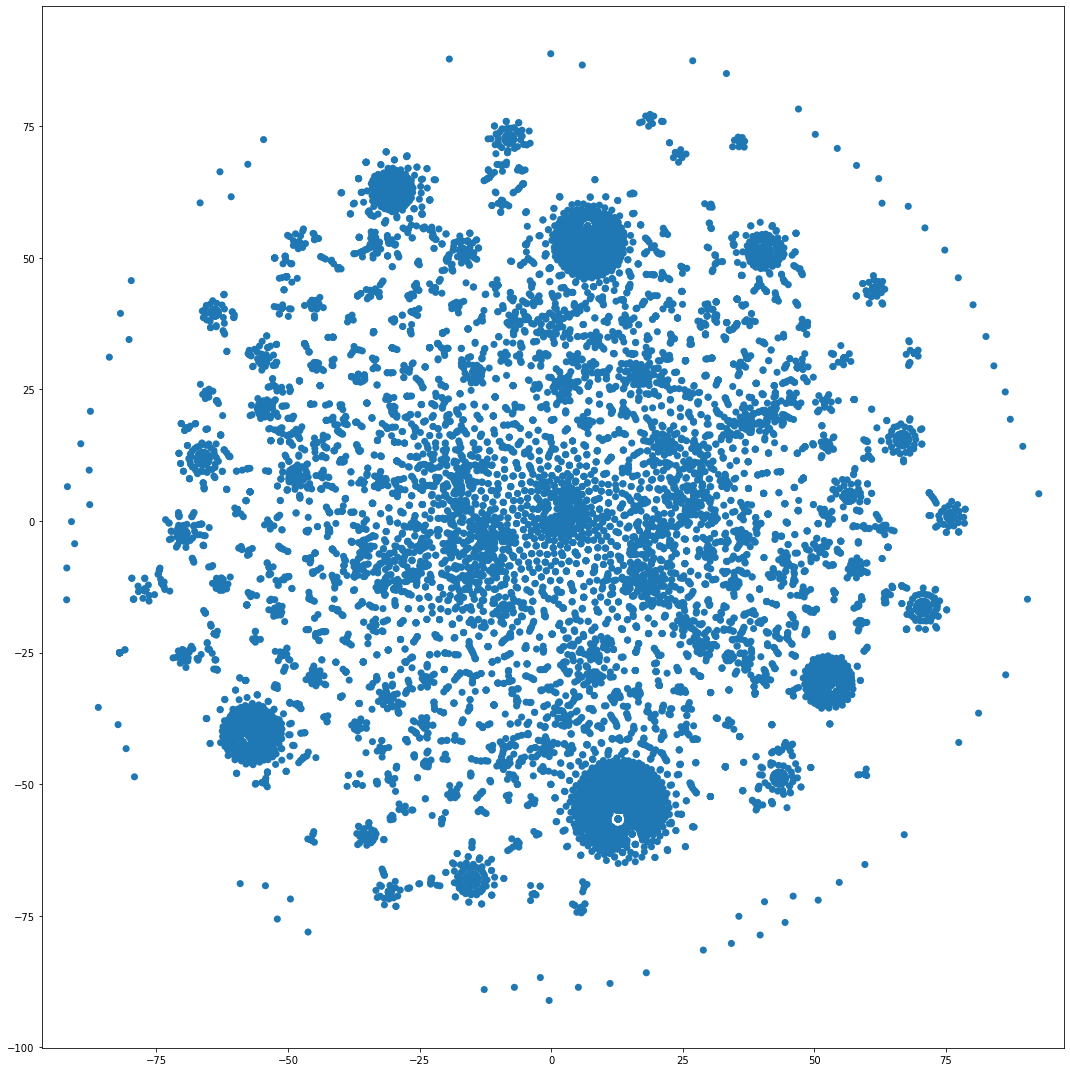

In [60]:
# With results obtained from distance matrix
plt.figure(figsize=(15, 15))
plt.scatter(noun_tsne_results[:, 0], noun_tsne_results[:, 1], marker='o', s=50, edgecolor='None')
plt.tight_layout()
plt.axis('equal')
plt.show()

In [35]:
noun_tsne_results[0]

array([ 11.886406, -45.596165], dtype=float32)

In [36]:
len(noun_tsne_results)

14590

In [61]:
new_tsne_results = []
results_with_words = []

for i, result in enumerate(noun_tsne_results_90):
    if result[0] > 30 and result[0] < 45 and result[1] < 75 and result[1] > 65:
        new_tsne_results.append(result)
        results_with_words.append([result, noun_df_90_dist.columns[i]])

In [62]:
len(new_tsne_results)

49

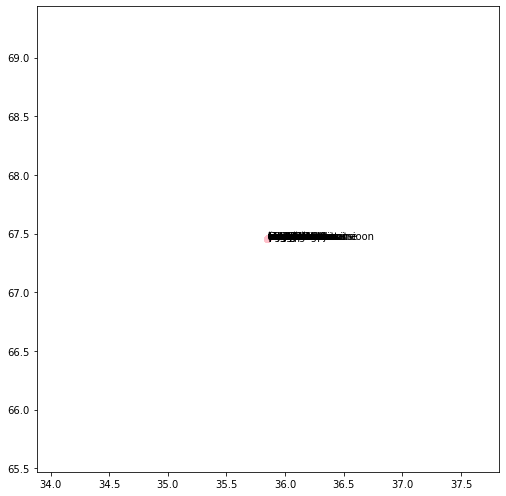

In [63]:
x = [r[0] for r in new_tsne_results]
y = [r[1] for r in new_tsne_results]
n = [ah[1] for ah in results_with_words]

plt.figure(figsize=(7, 7))
plt.scatter([r[0] for r in new_tsne_results], [r[1] for r in new_tsne_results], marker='o', s=50, edgecolor='None', c='pink')

for i, txt in enumerate(n):
    plt.annotate(n[i], (x[i], y[i]))

plt.tight_layout()
plt.axis('equal')
plt.show()

In [65]:
results_with_words

[[array([35.853024, 67.453125], dtype=float32), 'abiminister'],
 [array([35.853024, 67.453125], dtype=float32), 'agenda'],
 [array([35.853024, 67.453125], dtype=float32), 'allegooria'],
 [array([35.853024, 67.453125], dtype=float32), 'angazheeritus'],
 [array([35.853024, 67.453125], dtype=float32), 'angažeeritus'],
 [array([35.853024, 67.453125], dtype=float32), 'asüül'],
 [array([35.853024, 67.453125], dtype=float32), 'avantürist'],
 [array([35.853024, 67.453125], dtype=float32), 'avantüür'],
 [array([35.853024, 67.453125], dtype=float32), 'broiler'],
 [array([35.853024, 67.453125], dtype=float32), 'ebakorrektsus'],
 [array([35.853024, 67.453125], dtype=float32), 'ebaküpsus'],
 [array([35.853024, 67.453125], dtype=float32), 'erapooletus'],
 [array([35.853024, 67.453125], dtype=float32), 'erapoolikus'],
 [array([35.853024, 67.453125], dtype=float32), 'establishment'],
 [array([35.853024, 67.453125], dtype=float32), 'kallutatus'],
 [array([35.853024, 67.453125], dtype=float32), 'kemplus

In [70]:
for result in results_with_words:
    if dict_nouns[result[1]] != ['poliitiline']:
        print(result)

### Histograms based on similarity thresholds

In [39]:
from collections import defaultdict

In [40]:
thresholds = defaultdict(int)

In [42]:
t = (noun_df >= 0).sum().sum()

In [45]:
int(t / 2 - len(noun_df.index) / 2)

106426755

In [46]:
for threshold in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    # Finds the number of noun pairs that are at least as similar as the threshold
    # Since the similarity matrix includes each pair twice, we have to divide the 
    # result with two. In addition, we don't want to count the similarities of each
    # word to itself. After each division, half of the similarities between same word
    # will be removed, so we need to subtract half of the number of all nouns. 
    # Since each word has a similarity of 1 with itself, all of these similarities
    # will always be included and the subtraction can be made
    sim_noun_pairs = int((noun_df >= threshold).sum().sum() / 2 - len(noun_df.index) / 2)
    thresholds[threshold] = sim_noun_pairs

In [47]:
thresholds

defaultdict(int,
            {0: 106426755,
             0.1: 4944705,
             0.2: 2464747,
             0.3: 1460336,
             0.4: 948246,
             0.5: 933880,
             0.6: 452268,
             0.7: 445487,
             0.8: 445157,
             0.9: 445103,
             1: 445102})

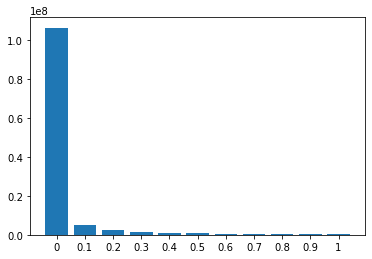

In [60]:
xi = list(range(len(thresholds.keys())))
plt.bar(xi, thresholds.values())
plt.xticks(xi, thresholds.keys())
plt.show()

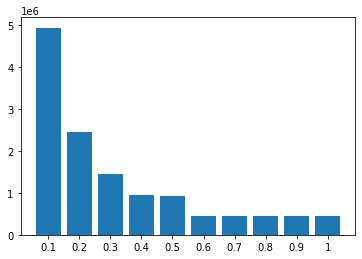

In [63]:
xi = list(range(len(list(thresholds.keys())[1:])))
plt.bar(xi, list(thresholds.values())[1:])
plt.xticks(xi, list(thresholds.keys())[1:])
plt.show()

### Clustering based on similarity matrix

In [14]:
noun_df_90 = noun_df.apply(lambda x: [y if y >= 0.9 else 0 for y in x])

In [15]:
noun_df_90

,3-seeria,A-klass,A-proov,A-riis,ABS-pidur,AKV-banaan,B-proov,Bondi-film,C-hepatiit,C-klass,...,šantaaž,šedööver,šerif,šiiit,šokk,šokolaad,žanr,žest,žürii,ω-3-rasvhape
3-seeria,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A-klass,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A-proov,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A-riis,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABS-pidur,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
šokolaad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
žanr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
žest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
žürii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
noun_df_90_dist = noun_df_90.apply(lambda x: 1-x)

In [19]:
noun_tsne_90 = TSNE(random_state=17, metric='precomputed')
noun_tsne_results_90 = noun_tsne_90.fit_transform(noun_df_90_dist.values)

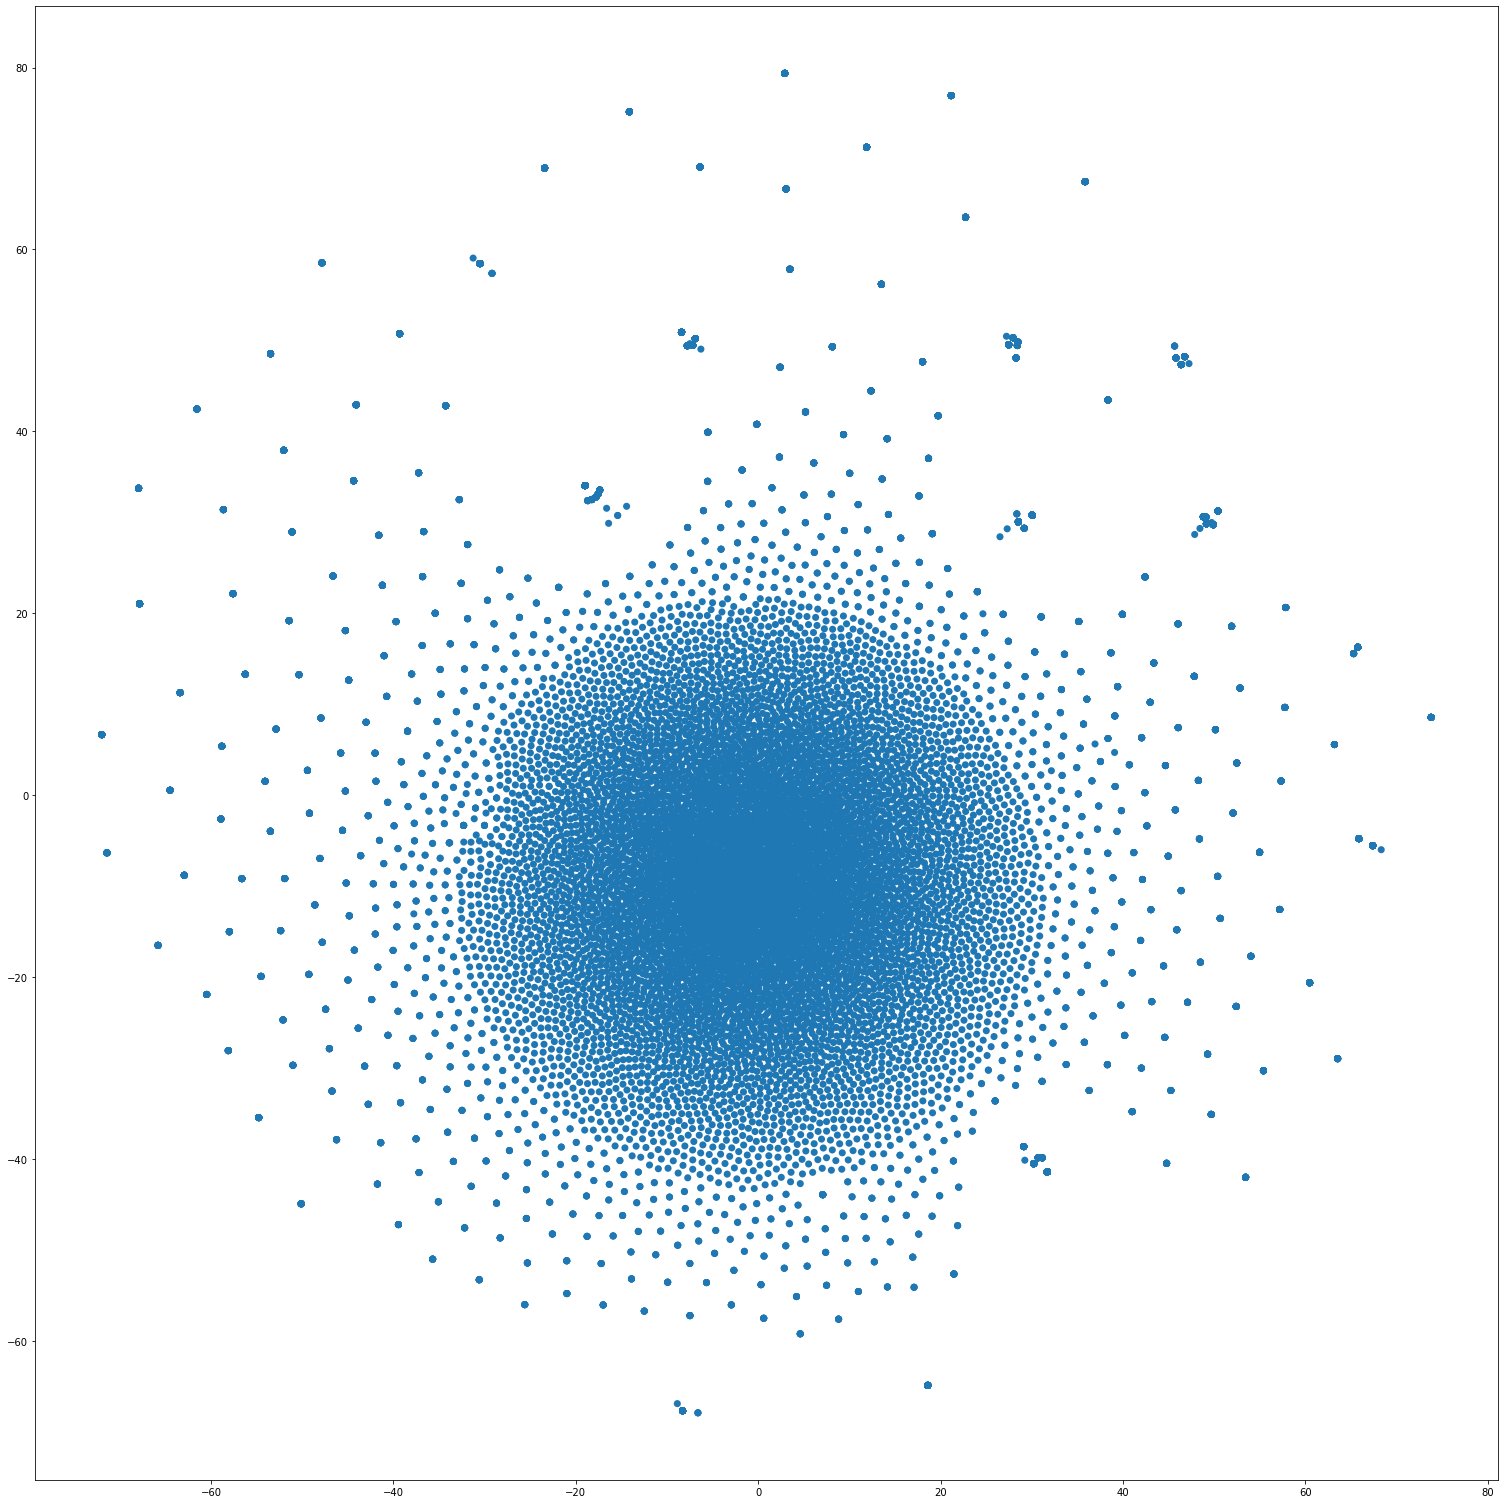

In [22]:
# With results obtained from distance matrix
plt.figure(figsize=(21, 21))
plt.scatter(noun_tsne_results_90[:, 0], noun_tsne_results_90[:, 1], marker='o', s=50, edgecolor='None')
plt.tight_layout()
plt.axis('equal')
plt.show()

In [30]:
new_tsne_results = []
results_with_words = []

for i, result in enumerate(noun_tsne_results_90):
    if result[0] > 45 and result[0] < 49 and result[1] < 31 and result[1] > 30.5:
        new_tsne_results.append(result)
        results_with_words.append([result, noun_df_90_dist.columns[i]])

In [31]:
len(new_tsne_results)

17

In [33]:
results_with_words

[[array([48.81646, 30.59766], dtype=float32), 'juhiomadus'],
 [array([48.81646, 30.59766], dtype=float32), 'juhtimistava'],
 [array([48.81646, 30.59766], dtype=float32), 'keelepraktika'],
 [array([48.81646, 30.59766], dtype=float32), 'konditsioon'],
 [array([48.81646, 30.59766], dtype=float32), 'koostöötahe'],
 [array([48.81646, 30.59766], dtype=float32), 'kyssa'],
 [array([48.81646, 30.59766], dtype=float32), 'lastetuba'],
 [array([48.81646, 30.59766], dtype=float32), 'maitseomadus'],
 [array([48.81646, 30.59766], dtype=float32), 'meelga'],
 [array([48.81646, 30.59766], dtype=float32), 'mikrokliima'],
 [array([48.81646, 30.59766], dtype=float32), 'nimepäev'],
 [array([48.81646, 30.59766], dtype=float32), 'parkimisvõimalus'],
 [array([48.81646, 30.59766], dtype=float32), 'ratsutaja'],
 [array([48.81646, 30.59766], dtype=float32), 'söögiisu'],
 [array([48.81646, 30.59766], dtype=float32), 'söögiseen'],
 [array([48.81646, 30.59766], dtype=float32), 'verevarustus'],
 [array([48.81646, 30.

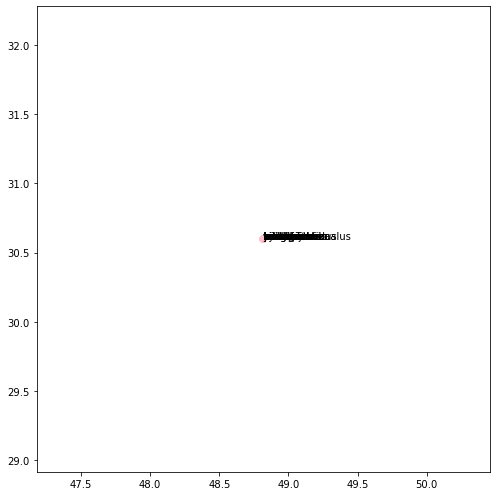

In [32]:
x = [r[0] for r in new_tsne_results]
y = [r[1] for r in new_tsne_results]
n = [ah[1] for ah in results_with_words]

plt.figure(figsize=(7, 7))
plt.scatter([r[0] for r in new_tsne_results], [r[1] for r in new_tsne_results], marker='o', s=50, edgecolor='None', c='pink')

for i, txt in enumerate(n):
    plt.annotate(n[i], (x[i], y[i]))

plt.tight_layout()
plt.axis('equal')
plt.show()

In [36]:
noun_df_90.loc[n][n]

,juhiomadus,juhtimistava,keelepraktika,konditsioon,koostöötahe,kyssa,lastetuba,maitseomadus,meelga,mikrokliima,nimepäev,parkimisvõimalus,ratsutaja,söögiisu,söögiseen,verevarustus,vestleja
juhiomadus,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
juhtimistava,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
keelepraktika,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
konditsioon,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
koostöötahe,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
kyssa,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
lastetuba,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
maitseomadus,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
meelga,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mikrokliima,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [40]:
for word in n:
    print(dict_nouns[word])

['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']
['hea']


### MCL

In [13]:
import markov_clustering as mcl

In [9]:
noun_df = pd.read_csv("noun_similarities.csv", index_col=0)

In [10]:
noun_df

,3-seeria,A-klass,A-proov,A-riis,ABS-pidur,AKV-banaan,B-proov,Bondi-film,C-hepatiit,C-klass,...,šantaaž,šedööver,šerif,šiiit,šokk,šokolaad,žanr,žest,žürii,ω-3-rasvhape
3-seeria,1.00,0.5,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,1.00,...,0.000000,0.0,0.0,0.0,0.083333,0.0,0.25,0.000000,0.000000,0.0
A-klass,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.50,...,0.000000,0.0,0.0,0.0,0.166667,0.0,0.20,0.000000,0.000000,0.0
A-proov,0.00,0.0,1.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0
A-riis,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0
ABS-pidur,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
šokolaad,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.000000,1.0,0.00,0.000000,0.000000,0.0
žanr,0.25,0.2,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.25,...,0.000000,0.0,0.0,0.0,0.066667,0.0,1.00,0.000000,0.000000,0.0
žest,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.166667,0.0,0.0,0.0,0.058824,0.0,0.00,1.000000,0.045455,0.0
žürii,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.074074,0.0,0.00,0.045455,1.000000,0.0


18. märts algus

In [18]:
import time
from datetime import timedelta, datetime

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

result = mcl.run_mcl(noun_df.values)     # run MCL with default parameters
clusters = mcl.get_clusters(result)      # get clusters

print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

20:36:04.685606


MemoryError: Unable to allocate 1.59 GiB for an array with shape (14590, 14590) and data type float64